In [1]:
# pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

2023-11-23 12:54:26.721625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

# 1 Data Preprocessing

In [4]:
df_train = pd.read_csv('train.csv', encoding='utf-8')
df_train.head()

,Unnamed: 0,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,465033,a1150802,2014-05-23,i1000742,1002,38,3.0,0,0.00,29.99,0,0.0,c1143392,2,BPRG,0
1,465034,a1150802,2014-05-23,i1000885,3493,38,3.0,1,22.99,22.99,0,0.0,c1143392,2,BPRG,1
2,465035,a1150802,2014-05-23,i1001839,1003,38,8.0,1,29.99,29.99,0,0.0,c1143392,2,BPRG,1
3,465036,a1150802,2014-05-23,i1002024,1953,38,8.0,1,35.00,49.99,0,0.0,c1143392,2,BPRG,1
4,465037,a1150802,2014-05-23,i1002030,1986,38,8.0,1,39.99,39.99,0,0.0,c1143392,2,BPRG,0


In [5]:
df_train.shape

(1860133, 16)

In [6]:
df_test = pd.read_csv('test.csv', encoding='utf-8')
df_test.head()

,Unnamed: 0,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod
0,1,a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG
1,2,a1000001,2014-01-01,i1000550,3854,44,3.0,1,20.00,39.99,0,0.0,c1010575,2,BPRG
2,3,a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG
3,4,a1000002,2014-01-01,i1001999,1992,38,8.0,1,49.99,49.99,0,0.0,c1045905,4,BPRG
4,5,a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC


In [7]:
df_test.shape

(465033, 15)

In [8]:
print(df_train.isna().sum())
print('==' * 10)
print(df_test.isna().sum())

Unnamed: 0          0
orderID             0
orderDate           0
articleID           0
colorCode           0
sizeCode            0
productGroup      291
quantity            0
price               0
rrp               291
voucherID           4
voucherAmount       0
customerID          0
deviceID            0
paymentMethod       0
returnQuantity      0
dtype: int64
Unnamed: 0        0
orderID           0
orderDate         0
articleID         0
colorCode         0
sizeCode          0
productGroup     60
quantity          0
price             0
rrp              60
voucherID         2
voucherAmount     0
customerID        0
deviceID          0
paymentMethod     0
dtype: int64


In [9]:
df_train = df_train.loc[df_train['voucherID'].notna()]
df_test = df_test.loc[df_test['voucherID'].notna()]

In [10]:
df_train['productGroup'].unique() # Заполним нулями, как неизвестной категорией

array([ 3.,  8.,  9.,  2., 13.,  1.,  4., 14., 45.,  5.,  6.,  7., 17.,
       50., 43., 15., nan, 90., 26.])

In [11]:
df_train['productGroup'] = df_train['productGroup'].fillna(0)
df_test['productGroup'] = df_test['productGroup'].fillna(0)

In [12]:
df_train['rrp'] = df_train['rrp'].fillna(df_train['rrp'].median())
df_test['rrp'] = df_test['rrp'].fillna(df_test['rrp'].median())

In [13]:
print(df_train.isna().sum())
print('==' * 10)
print(df_test.isna().sum())

Unnamed: 0        0
orderID           0
orderDate         0
articleID         0
colorCode         0
sizeCode          0
productGroup      0
quantity          0
price             0
rrp               0
voucherID         0
voucherAmount     0
customerID        0
deviceID          0
paymentMethod     0
returnQuantity    0
dtype: int64
Unnamed: 0       0
orderID          0
orderDate        0
articleID        0
colorCode        0
sizeCode         0
productGroup     0
quantity         0
price            0
rrp              0
voucherID        0
voucherAmount    0
customerID       0
deviceID         0
paymentMethod    0
dtype: int64


In [14]:
df_train = df_train.drop('orderDate', axis=1)
df_test = df_test.drop('orderDate', axis=1)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860129 entries, 0 to 1860132
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   orderID         object 
 2   articleID       object 
 3   colorCode       int64  
 4   sizeCode        object 
 5   productGroup    float64
 6   quantity        int64  
 7   price           float64
 8   rrp             float64
 9   voucherID       object 
 10  voucherAmount   float64
 11  customerID      object 
 12  deviceID        int64  
 13  paymentMethod   object 
 14  returnQuantity  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 227.1+ MB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465031 entries, 0 to 465032
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     465031 non-null  int64  
 1   orderID        465031 non-null  object 
 2   articleID      465031 non-null  object 
 3   colorCode      465031 non-null  int64  
 4   sizeCode       465031 non-null  object 
 5   productGroup   465031 non-null  float64
 6   quantity       465031 non-null  int64  
 7   price          465031 non-null  float64
 8   rrp            465031 non-null  float64
 9   voucherID      465031 non-null  object 
 10  voucherAmount  465031 non-null  float64
 11  customerID     465031 non-null  object 
 12  deviceID       465031 non-null  int64  
 13  paymentMethod  465031 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 53.2+ MB


In [17]:
df_train.deviceID.value_counts()

2    1309101
3     313391
4     128508
5     109090
1         39
Name: deviceID, dtype: int64

ID, как правило, столбцы имеют слишком много уникальных значений и не несут информационой значимости. Однако мы оставим VoucherID, DeviceID как 2 категориальных признака – там не так много уникальных значений

In [18]:
df_train['articleID'].nunique()

3229

In [19]:
df_train['orderID'].nunique()

589157

In [20]:
df_train['customerID'].nunique()

262691

In [21]:
# df_train = df_train.drop(['orderID', 'customerID'], axis=1)
# df_test = df_test.drop(['orderID', 'customerID'], axis=1)

# 2 EDA

In [22]:
def numeric_visual(df, field):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[field], kde=True)
    plt.xlabel('Признак')
    plt.ylabel('Величина')
    plt.title(f'Распределение признака {field}')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[field])
    plt.xlabel('Признак')
    plt.ylabel('Величина')
    plt.title(f'Распределение признака {field}')
    plt.show()

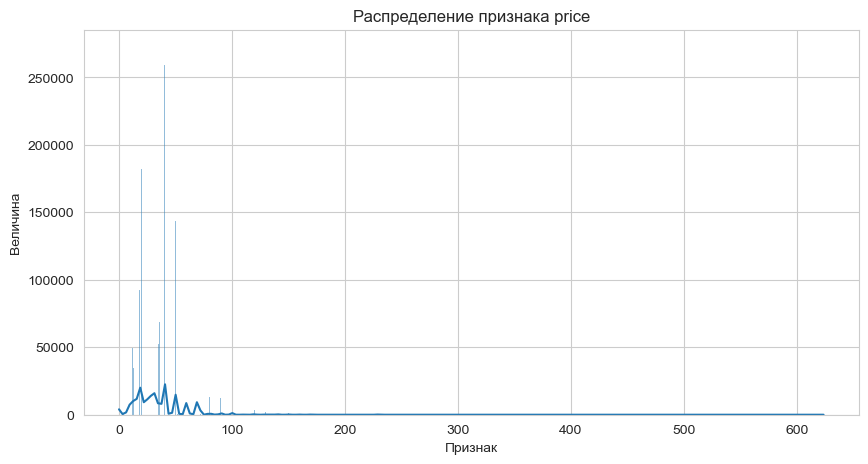

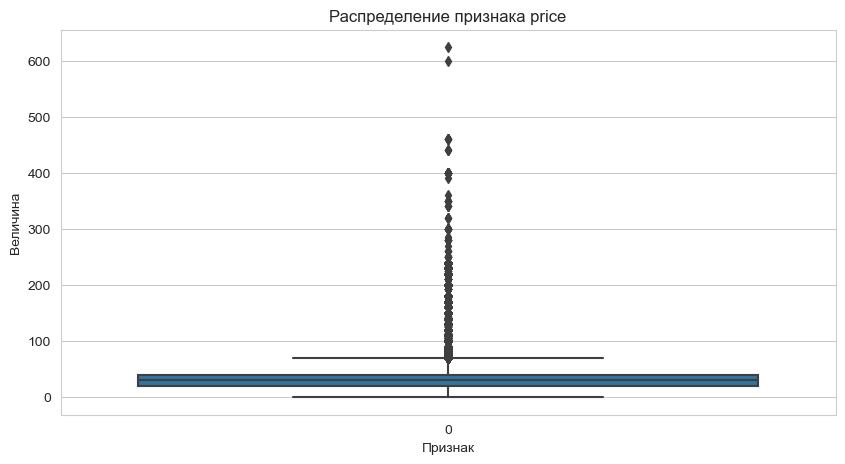

In [23]:
numeric_visual(df_train, 'price')

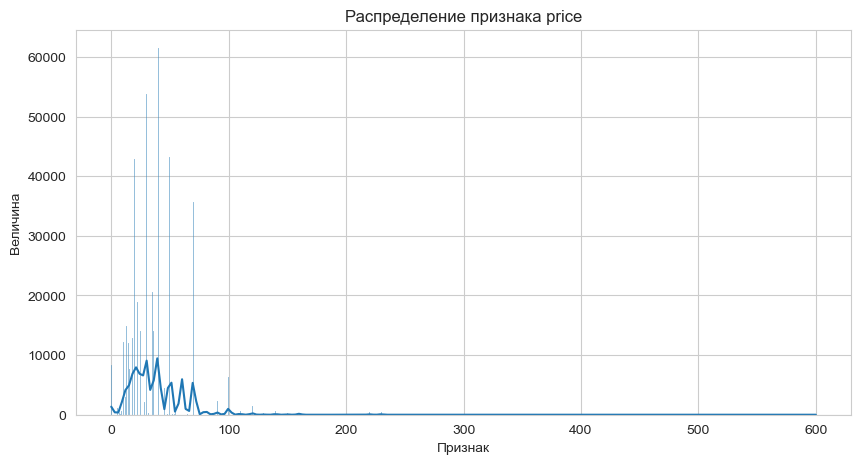

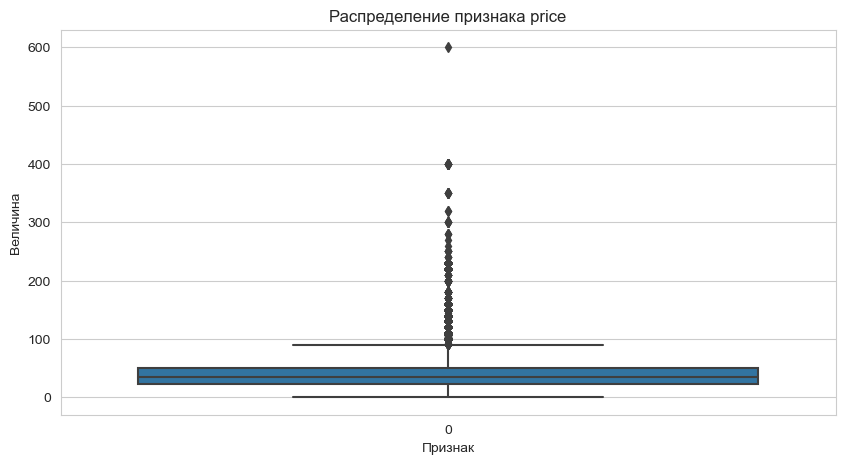

In [24]:
numeric_visual(df_test, 'price')

В данных цены выше 150 у.е. являются выбросами, их удаление не окажет негативного влияния на качество данных


In [25]:
df_train = df_train.loc[df_train['price'] < 100]
df_test = df_test.loc[df_test['price'] < 100]

In [26]:
df_train.shape

(1842110, 15)

In [27]:
print(f'Сохранено {(100 / 1860133) * 1842110} % данных')

Сохранено 99.03109078759422 % данных


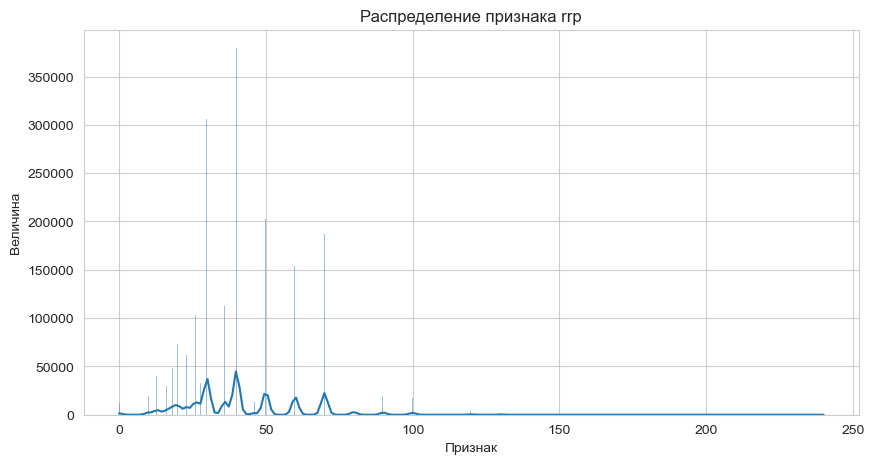

In [28]:
# Тут функция подтормаживает, поэтому сделаю графики процедурно
plt.figure(figsize=(10, 5))
sns.histplot(df_train['rrp'], kde=True)
plt.xlabel('Признак')
plt.ylabel('Величина')
plt.title(f'Распределение признака rrp')
plt.show()

In [29]:
df_train = df_train.loc[df_train['rrp'] < 100]
df_test = df_test.loc[df_test['rrp'] < 100]

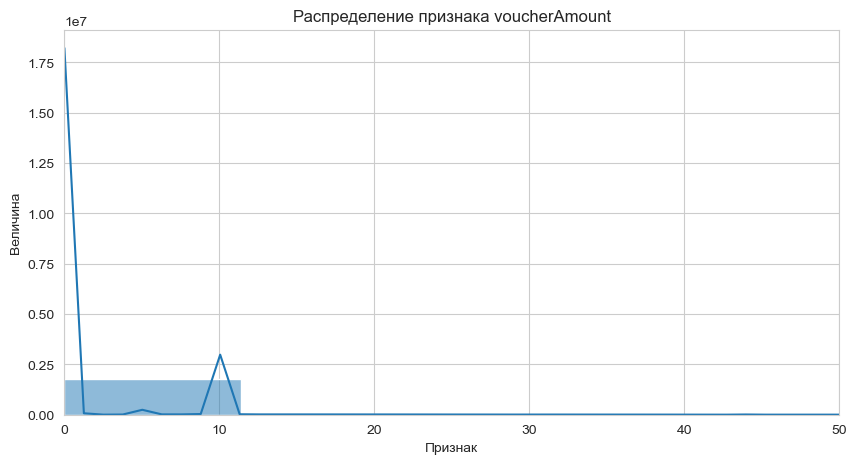

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['voucherAmount'], kde=True)
plt.xlabel('Признак')
plt.ylabel('Величина')
plt.xlim(0, 50)
plt.title(f'Распределение признака voucherAmount')
plt.show()

In [31]:
df_train = df_train.loc[df_train['voucherAmount'] < 15]
df_test = df_test.loc[df_test['voucherAmount'] < 15]
df_train.shape

(1800337, 15)

In [32]:
print(f'Сохранено {(100 / 1860133) * 1800337} % данных')

Сохранено 96.78539115213805 % данных


In [33]:
df_train.colorCode.value_counts(ascending=True)

3917         1
1955         1
6745         1
6743         1
1926         2
         ...  
1014     41703
1012     56720
1000     58044
1493     70252
1001    185634
Name: colorCode, Length: 486, dtype: int64

In [34]:
df_train.paymentMethod.value_counts()

BPRG        1398385
CBA          140307
PAYPALVC     132893
KKE           80883
VORAUS        19880
NN            13056
BPLS          10908
BPPL           4020
RG                5
Name: paymentMethod, dtype: int64

In [35]:
df_train.shape

(1800337, 15)

In [36]:
df_train = df_train.drop_duplicates().reset_index(drop=True)
df_test = df_test.drop_duplicates().reset_index(drop=True)

In [37]:
df_train.shape

(1800337, 15)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800337 entries, 0 to 1800336
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   orderID         object 
 2   articleID       object 
 3   colorCode       int64  
 4   sizeCode        object 
 5   productGroup    float64
 6   quantity        int64  
 7   price           float64
 8   rrp             float64
 9   voucherID       object 
 10  voucherAmount   float64
 11  customerID      object 
 12  deviceID        int64  
 13  paymentMethod   object 
 14  returnQuantity  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 206.0+ MB


**Вывод**

- В ходе предобработки и исследовательского анализа данных были заполнены пропуски в данных, удалены нерелевантные поля: временные и уникальные значения ID
- Были изучены распределения количественных признаков
- Были обнаружены и удалены выбросы в количественных признаках
- Сделана проверка на наличие дубликатов

# 3 Data Encoding

In [39]:
X_train = df_train.drop('returnQuantity', axis=1)
y_train = df_train['returnQuantity']

In [40]:
X_train.columns

Index(['Unnamed: 0', 'orderID', 'articleID', 'colorCode', 'sizeCode',
       'productGroup', 'quantity', 'price', 'rrp', 'voucherID',
       'voucherAmount', 'customerID', 'deviceID', 'paymentMethod'],
      dtype='object')

In [41]:
X_test = df_test

In [42]:
encoder = LabelEncoder()

X = pd.concat([X_train, X_test])

if X_train['articleID'].dtype == 'object':
    encoder.fit(X['articleID'])
    X_train['articleID'] = encoder.transform(X_train['articleID'])
    X_test['articleID'] = encoder.transform(X_test['articleID'])

if X_train['orderID'].dtype == 'object':
    encoder.fit(X['orderID'])
    X_train['orderID'] = encoder.transform(X_train['orderID'])
    X_test['orderID'] = encoder.transform(X_test['orderID'])

if X_train['customerID'].dtype == 'object':
    encoder.fit(X['customerID'])
    X_train['customerID'] = encoder.transform(X_train['customerID'])
    X_test['customerID'] = encoder.transform(X_test['customerID'])

if X_train['sizeCode'].dtype == 'object':
    encoder.fit(X['sizeCode'])
    X_train['sizeCode'] = encoder.transform(X_train['sizeCode'])
    X_test['sizeCode'] = encoder.transform(X_test['sizeCode'])

if X_train['voucherID'].dtype == 'object':
    encoder.fit(X['voucherID'])
    X_train['voucherID'] = encoder.transform(X_train['voucherID'])
    X_test['voucherID'] = encoder.transform(X_test['voucherID'])

if X_train['paymentMethod'].dtype == 'object':
    encoder.fit(X['paymentMethod'])
    X_train['paymentMethod'] = encoder.transform(X_train['paymentMethod'])
    X_test['paymentMethod'] = encoder.transform(X_test['paymentMethod'])

In [43]:
X_train.head()

,Unnamed: 0,orderID,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod
0,465033,144030,702,1002,13,3.0,0,0.00,29.99,0,0.0,133391,2,2
1,465034,144030,845,3493,13,3.0,1,22.99,22.99,0,0.0,133391,2,2
2,465035,144030,1678,1003,13,8.0,1,29.99,29.99,0,0.0,133391,2,2
3,465036,144030,1861,1953,13,8.0,1,35.00,49.99,0,0.0,133391,2,2
4,465037,144030,1867,1986,13,8.0,1,39.99,39.99,0,0.0,133391,2,2


In [44]:
X_train.shape

(1800337, 14)

In [45]:
X_test.shape

(449252, 14)

In [46]:
y_train.shape

(1800337,)

In [47]:
y_train.value_counts()

1    919724
0    878003
2      2471
3       104
4        18
5        17
Name: returnQuantity, dtype: int64

In [48]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weights))

In [49]:
class_weight

{0: 0.3417484526438596,
 1: 0.32624588101068003,
 2: 121.43106704438149,
 3: 2885.1554487179487,
 4: 16669.787037037036,
 5: 17650.36274509804}

# 4 Model creation

In [50]:
input_dim = 14

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=input_dim))
model.add(Dense(units=6, activation='softmax'))

2023-11-23 12:55:15.120030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=keras.metrics.CategoricalAccuracy(
        name="categorical_accuracy", dtype=None
    )
)

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,350
Trainable params: 1,350
Non-trainable params: 0
_________________________________________________________________


In [53]:
#y_train_onehot = to_categorical(y_train, num_classes=6)

In [54]:
X_train_tf = X_train.astype(float)
y_train_tf = y_train.astype(float)

model.fit(X_train_tf, 
          y_train_tf, 
          class_weight=class_weight, 
          epochs=3, 
          verbose=2)

Epoch 1/3
56261/56261 - 43s - loss: 80713.9844 - categorical_accuracy: 0.2191 - 43s/epoch - 770us/step
Epoch 2/3
56261/56261 - 42s - loss: 41782.9180 - categorical_accuracy: 0.2547 - 42s/epoch - 752us/step
Epoch 3/3
56261/56261 - 42s - loss: 4774.2520 - categorical_accuracy: 0.6069 - 42s/epoch - 752us/step


# 5 Model Save

In [60]:
model.save('h1_classifier.h5')

In [61]:
y_pred = model.predict(X_test)

14040/14040 [==============================] - 8s 534us/step


In [62]:
y_pred.shape

(449252, 6)

In [63]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0,1,2,3,4,5
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
449247,0.211544,0.209282,0.199847,0.212292,0.079236,0.087799
449248,0.211544,0.209282,0.199847,0.212292,0.079236,0.087799
449249,0.211544,0.209282,0.199847,0.212292,0.079236,0.087799
449250,0.211544,0.209282,0.199847,0.212292,0.079236,0.087799


In [64]:
max_class = y_pred.idxmax(axis=1)
result_series = pd.Series(max_class, name='max_class')
result_series

0         0
1         0
2         0
3         0
4         0
         ..
449247    3
449248    3
449249    3
449250    3
449251    3
Name: max_class, Length: 449252, dtype: int64

In [65]:
df_test['returnQuantity'] = result_series

In [66]:
df_test.head()

,Unnamed: 0,orderID,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,1,0,346,1972,16,3.0,1,10.00,29.99,0,0.0,9856,2,2,0
1,2,0,511,3854,16,3.0,1,20.00,39.99,0,0.0,9856,2,2,0
2,3,1,1828,2974,13,8.0,1,35.00,49.99,0,0.0,42225,4,2,0
3,4,1,1836,1992,13,8.0,1,49.99,49.99,0,0.0,42225,4,2,0
4,5,2,1779,1968,15,8.0,1,10.00,35.99,0,0.0,81418,2,6,0


In [67]:
df_test.to_csv('Hw1_Kashitskii_Kukarkin.csv')